# Exercise:1

# Exercise:1a

Q. (1 point) Scrape the table of S&P 500 component stocks from this URL. You should drop the SEC filings column and standardize the Central Index Key (CIK) column to a 10-digit string, which is a unique identifier for each company provided by the U.S. Securities and Exchange Commission.

In [770]:
%pylab inline
import re
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [771]:
import pandas as pd
#scraping the data from the url below
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
df = pd.read_html(url, index_col=None,skiprows=1)[0]
#providing proper columns for the data
df.columns=['Ticker symbol','Security','SEC filings','GICS Sector','GICS Sub Industry','Address of Headquarters','Date first added','CIK']
df.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [772]:
#dropped the Sec filings column using .drop function
df=df.drop('SEC filings',axis=1)

In [773]:
#standardizing the CIK column by padding 0's using zfill function to make it a 10 digit string which is unique for every company
df['CIK']=df['CIK'].map(lambda x:str(x).zfill(10))

In [774]:
df.head()

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152
3,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373
4,ATVI,Activision Blizzard,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,0000718877


# Exercise 1b

Q.Create a concise listing of the S&P company tickers that can serve as a cheat sheet for the companies listed in the index. Specifically, for each letter (A-Z), list all of the S&P company tickers (an explicit Python list is not required, a concatenated string is also acceptable), and store in an appropriate data structure. You must demonstrate the results in a readable form, either by displaying concisely (but completely) in your notebook or by saving to a .csv file and uploading with your submission.

In [775]:
#creating the dictionary for the cheat sheet and setting the first unique letters of all the tickers as the key value for the dictionary and appending the ticker as the value
#empty dictionary created
cheat_sheet = {}
#extracting all the 'Ticker symbol' values from the dataframe
tickers=df['Ticker symbol']

for i in tickers:
    #setting the first character as the keys
    keys = i[0]
    #formating the dictionary to keys and list of values
    cheat_sheet.setdefault(keys, [])
    #appending the corresponding ticker values to the keys
    cheat_sheet[keys].append(i)
cheat_sheet

{'A': ['ABT',
  'ABBV',
  'ACN',
  'ATVI',
  'AYI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AET',
  'AMG',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'AGN',
  'ADS',
  'ALL',
  'AMZN',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'APC',
  'ADI',
  'ANDV',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ARNC',
  'AJG',
  'AIZ',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'AVGO'],
 'B': ['BHGE',
  'BLL',
  'BAC',
  'BK',
  'BAX',
  'BBT',
  'BDX',
  'BRK.B',
  'BBY',
  'BIIB',
  'BLK',
  'BA',
  'BKNG',
  'BWA',
  'BXP',
  'BSX',
  'BHF',
  'BMY',
  'BF.B',
  'BEN'],
 'C': ['CHRW',
  'CA',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'CCL',
  'CAT',
  'CBOE',
  'CBRE',
  'CBS',
  'CELG',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'CHTR',
  'CVX',
  'CMG',
  'CB',
  'CHD',
  'CI',
  'CINF',
  'CTAS',
  'CSCO',
  '

# Exercise:1c

Q.Create a function find_company that accepts the S&P 500 data frame (df) and a string pattern (pat) as required input arguments (i.e., without default values) and returns a data frame that contains the subset of companies with the string pattern in their name (Security column). This function can be used to help you find the ticker for a particular company in the second part of the assignment. Demonstrate that your function properly returns the subset of companies with the substring 'Auto' and (separately) the subset of companies with digits (numbers) in their names.

In [776]:
#the find_company functiion below accepts the data frame and pattern
def find_company(df,pat):
    #creating an empty list
    l=[]
    #compiling the pattern using the regular expression function "compile"
    x=re.compile(pat)
    #interating through the dataframe
    for i,row in df.iterrows():
        #using the "search" regex function to find the pattern in the "Security" column
        pattern=bool(re.search(x,row['Security']))
        #if the pattern is found then that row is appended to the empty list l
        if pattern:
            l.append(row)
    #the list is converted into a dataframe
    output=pd.DataFrame(l)
    #returns a data frame as output
    return output

In [777]:
#the below function finds subset of companies that have "Auto" as part of their names
find_company(df,'Auto')

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,0001158449
59,ADSK,Autodesk Inc.,Information Technology,Application Software,"San Rafael, California",1989-12-01,0000769397
60,ADP,Automatic Data Processing,Information Technology,Internet Software & Services,"Roseland, New Jersey",1981-03-31,0000008670
61,AZO,AutoZone Inc,Consumer Discretionary,Specialty Stores,"Memphis, Tennessee",1997-01-02,0000866787
352,ORLY,O'Reilly Automotive,Consumer Discretionary,Specialty Stores,"Springfield, Missouri",2009-03-27,0000898173
402,ROK,Rockwell Automation Inc.,Industrials,Electrical Components & Equipment,"Milwaukee, Wisconsin",NaN,0001024478


In [778]:
#the below function finds subset of companies that have "Digits" as part of their names
find_company(df,'\d')

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740
188,FFIV,F5 Networks,Information Technology,Communications Equipment,"Seattle, Washington",2010-12-20,0001048695
280,LLL,L-3 Communications Holdings,Industrials,Aerospace & Defense,"New York, New York",NaN,0001056239
370,PSX,Phillips 66,Energy,Oil & Gas Refining & Marketing,"Houston, Texas",2012-05-01,0001534701


# Exercise:1d

Most tickers serve as a 1-5 letter abbreviation of the company's name, but not all companies follow this trend. Compute the proportion of companies whose ticker and name begins/does not begin with the same character, and display a data frame containing the latter subset of companies. Select two of these companies and explain the likely reason for the selection of their ticker (i.e., why did they opt for this ticker instead of a more straightforward abbreviation?).

In [779]:
#creating an empty list
result=[] 
#loops through the data frame and appends 'Y' to the list if the company names and tickers begin with same character and 'N' otherwise
for index,row in df.iterrows():
    if (row['Ticker symbol'][0]).upper() == (row["Security"][0]).upper():
        result.append('Y')
    else:
        result.append('N')

In [780]:
#groups the dataframe by the result list
new_group=df.groupby(by=result)
new_group

In [781]:
#printing the group and its length we know that there are 465 companies with names and tickers beginning with same character and 40 which don't
for name,group in new_group:
    print(name,len(group))

N 40
Y 465


In [782]:
#the below display is the list of company names and tickers that do not begin with same character
new_group.get_group('N')

,Ticker symbol,Security,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,0000066740
24,LNT,Alliant Energy Corp,Utilities,Electric Utilities,"Madison, Wisconsin",2016-07-01,0000352541
26,GOOGL,Alphabet Inc Class A,Information Technology,Internet Software & Services,"Mountain View, California",2014-04-03,0001652044
27,GOOG,Alphabet Inc Class C,Information Technology,Internet Software & Services,"Mountain View, California",2006-04-03,0001652044
28,MO,Altria Group Inc,Consumer Staples,Tobacco,"Richmond, Virginia",NaN,0000764180
58,T,AT&T Inc.,Telecommunication Services,Integrated Telecommunication Services,"Dallas, Texas",1983-11-30,0000732717
67,BK,The Bank of New York Mellon Corp.,Financials,Asset Management & Custody Banks,"New York, New York",1995-03-31,0001390777
75,HRB,Block H&R,Financials,Consumer Finance,"Kansas City, Missouri",1986-11-30,0000012659
83,AVGO,Broadcom,Information Technology,Semiconductors,"San Jose, California",2014-05-08,0001441634
92,KMX,Carmax Inc,Consumer Discretionary,Specialty Stores,"Richmond, Virginia",2010-06-28,0001170010


The first company that I have chosen to reason why they chose a differnt ticker is:
3M company ~ MMM
Since 3M Company starts with a digit, they have decided to represent it in terms of letters which represents the three M's so they assigned the ticker MMM . Since the most of the Tickers have followed the convention of using only letters.

The second company is
The Walt Disney Company ~ DIS
Since the name starts with an article "The" which is used for many companies, they have chosen a more well-known and unique part of the company name i.e Disney.

In [783]:
#using the above grouping,  the length of companies that begin with same first character as the ticker is stored in begin and that don't in does_not_begin
for name,group in new_group:
    if name =='Y':
        begin=len(group)
    else:
        does_not_begin=len(group)
#the below begin_percent calculates the % of companies that begin with same first character as the ticker
begin_percent=(begin/len(df))*100
#the below does_not_begin_percent calculates the % of companies that does not begin with same first character as the ticker
does_not_begin_percent=(does_not_begin/len(df))*100
#the below proportion has the proportion of the two
proportion=begin/does_not_begin

print("The % of companies whose ticker begins with same character are ",begin_percent,'%')
print("The % of company whose ticker does not begin with same character are ",does_not_begin_percent,'%')
print("The proportion of company whose ticker begins with same character/does not begin with same are ",proportion)

The % of companies whose ticker begins with same character are  92.07920792079209 %
The % of company whose ticker does not begin with same character are  7.920792079207921 %
The proportion of company whose ticker begins with same character/does not begin with same are  11.625


#Exercise:1e

Q.Analyze the industry concentration (i.e., the proportion of companies in each industry) within the (full) S&P 500, based on the GICS sector column. Describe (in words) how the S&P is distributed, using appropriate descriptive results to support your assessment.

In [784]:
#grouping the function by the GICS Sector column using groupby
industry_group=df.groupby(by="GICS Sector")
industry_group

In [785]:
for name,group in industry_group:
    print(name,len(group))

Consumer Discretionary 82
Consumer Staples 34
Energy 31
Financials 70
Health Care 61
Industrials 67
Information Technology 71
Materials 25
Real Estate 33
Telecommunication Services 3
Utilities 28


In [786]:
for name,group in industry_group:
    if name =='Consumer Discretionary':
        Consumer_Discretionary=len(group)
    elif name=='Consumer Staples':
        Consumer_Staples=len(group)
    elif name=='Energy':
        Energy=len(group)
    elif name=='Financials':
        Financials=len(group)
    elif name=='Health Care':
        Health_Care=len(group)
    elif name=='Industrials':
        Industrials=len(group)
    elif name=='Information Technology':
        Information_Technology=len(group)
    elif name=='Materials':
        Materials=len(group)
    elif name=='Real Estate':
        Real_Estate=len(group)
    elif name=='Telecommunication Services':
        Telecommunication_Services=len(group)
    else:
        Utilities=len(group)

print("The Percentage of Consumer Discretionary of is:",(Consumer_Discretionary/len(df))*100,'%')
print("The Percentage of Consumer Staples of is:",(Consumer_Staples/len(df))*100,'%')
print("The Percentage of Energy of is:",(Energy/len(df))*100,'%')
print("The Percentage of Financials of is:",(Financials/len(df))*100,'%')
print("The Percentage of Health Care of is:",(Health_Care/len(df))*100,'%')
print("The Percentage of Industrials of is:",(Industrials/len(df))*100,'%')
print("The Percentage of Information Technology of is:",(Information_Technology/len(df))*100,'%')
print("The Percentage of Materials of is:",(Materials/len(df))*100,'%')
print("The Percentage of Real Estate of is:",(Real_Estate/len(df))*100,'%')
print("The Percentage of Telecommunication Services of is:",(Telecommunication_Services/len(df))*100,'%')
print("The Percentage of Utilities of is:",(Utilities/len(df))*100,'%')


The Percentage of Consumer Discretionary of is: 16.237623762376238 %
The Percentage of Consumer Staples of is: 6.732673267326733 %
The Percentage of Energy of is: 6.138613861386139 %
The Percentage of Financials of is: 13.861386138613863 %
The Percentage of Health Care of is: 12.07920792079208 %
The Percentage of Industrials of is: 13.267326732673268 %
The Percentage of Information Technology of is: 14.059405940594061 %
The Percentage of Materials of is: 4.9504950495049505 %
The Percentage of Real Estate of is: 6.534653465346535 %
The Percentage of Telecommunication Services of is: 0.594059405940594 %
The Percentage of Utilities of is: 5.544554455445545 %


S&P is divided into 11 industries as mentioned below:
The highest concentration of companies are from the Consumer Discretionary industry with 16.24% i.e 82 companies.
The least concentration of companies are from the Telecommunication Services industry with 0.59% i.e 3 companies. 
Industries which have over 10% companies are Financials, Health Care, Industrials, Information Technology.
Industries under 10% companies are Consumer Staples,Energy,Materials,Real Estate,Utilities

# Exercise 2

# Exercise:2a

Q.Set up your code by specifying the ticker of an S&P 500 company (your choice) as a string assigned to a variable. Use the pandas-datareader to extract historical price (open, high, low, and close) and trading volume of your selected stock from the Morningstar API (see documentation), which should date back to Jan. 1, 2010 (according to my test cases). Drop the outer level of the resulting hierarchical index (i.e., the level containing the stock ticker) and preview the first five rows of the resulting data frame.

In [787]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2010, 1, 1)
end = datetime(2018, 7, 4)
#using the ticker COL of the company Rockwell Collins
ticker_var='COL'
#extracting historical price (open, high, low, and close) and trading volume of COL
f = web.DataReader(ticker_var, 'morningstar', start, end)

In [788]:
f=pd.DataFrame(f)
f=f.reset_index()
f=f.set_index(keys='Date')
#dropped the hierarchial index
f=f.drop('Symbol',axis=1)
#preview of first five rows
f.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-01,55.36,56.39,55.30,56.22,0
2010-01-04,56.35,56.63,55.64,55.83,828011
2010-01-05,56.36,56.64,55.96,56.07,515120
2010-01-06,56.42,56.93,56.10,56.10,895396
2010-01-07,56.83,56.97,56.14,56.14,605489


# Exercise:2b

Q.Report the stock information (i.e., price and trading volume data) from Jan. 29, 2018, the day before the U.S. President's State of the Union (SOTU) speech, which is often an important event for the financial exchanges. Then, report the stock information 45 days after the SOTU speech. Calculate the percent difference in the closing stock price (relative to Jan. 29, 2018), and report the percent difference in a formatted string in the form of:

The closing price of [Ticker] has changed by [Percent Difference]% between [Jan. 29, 2018] and [45 days later].

where the entries in brackets represent variables that you will specify/calculate along the way. This format will facilitate reporting a similar analysis for other stock tickers. You may output the dates in any reasonable format.

In [789]:
#setting the start date as mentioned
start = datetime(year=2018,month=1,day=29)
#setting time delta of 45 days
td = dt.timedelta(days=45)
end = start + td
#calculation the percentage differnce in closing stock price relative to Jan 29,2018
p=((f.loc[start][0]-f.loc[end][1])/f.loc[start][0])*100
print('The closing price of '+ ticker_var +' has changed by '+ str(p) + ' % between ' + str(start) + ' and '+ str(end) +'.')

The closing price of COL has changed by 1.26573123101 % between 2018-01-29 00:00:00 and 2018-03-15 00:00:00.


# Exercise:2c

Q.Define a function plot_price that will visualize the complete time series of a specified price column (i.e., Open, High, Low, or Close) over a specified period.The function should take in the full stock data frame and a price argument that specifies the type of price (as a string) that you want to visualize.The period should be defined using separate arguments (start, end) that can be input to the function in any date format appropriate for slicing time series data. The start and end arguments should each have None as default values, which signifies that you should include all of the data from the beginning (if start=None) and the end (if end=None) of the date range for the data in the default case.The visualization should be of the appropriate type for time series data, and the x- and y-axis should be appropriately labeled. Demonstrate the performance of your function on the Close price of your selected stock for the full date range and (separately) for the last year. Provide a brief description of the price history (full date range and over the last year) of your selected stock.

In [790]:
#function to parse any given date
from dateutil.parser import parse
def date_parse(da):
    a=parse(da)
    return a

In [791]:
date_parse('01-01-2018')

datetime.datetime(2018, 1, 1, 0, 0)

In [792]:
#defining a function with data frame, price, start and end as the arguments and start and end have none as the default argument 
def plot_price(data_frame,price,start=None, end=None):
    price=str(price)
    #if start is the default is the beginning date
    if start==None:
        start='2010-01-01'
    #if end is none the default is the end date
    if end==None:
        end='2018-07-04'
    #parse start and end for different date formats
    start=date_parse(start)
    end=date_parse(end)
    #provide the date range in a new data frame
    df1 = data_frame[start:end]
    #plot the give price value accordingly
    df1['new']=df1[price].plot(figsize=(8,4))
    #labeling x axis
    plt.xlabel('Time')
    #labeling y axis
    plt.ylabel(price)
    return 

C:\Users\rithu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


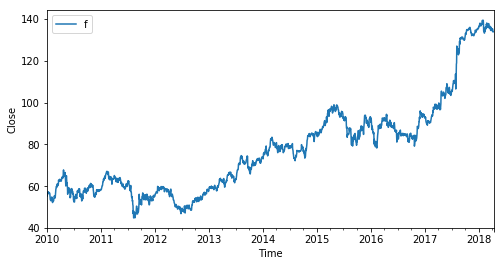

In [793]:
#this is the plot for the full data range which is the default value so have not given the start and end 
plot_price(f,'Close')
plt.legend("full range")

C:\Users\rithu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


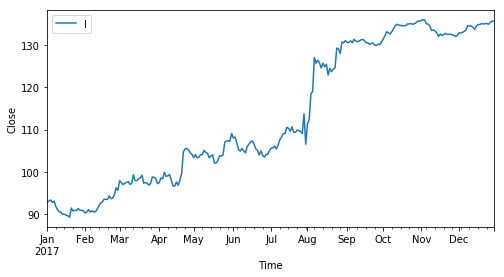

In [794]:
#this is the plot for the last year
plot_price(f,'Close',start='Jan 01, 2017',end='Dec 31, 2017')
plt.legend("last year")

# Exercise:2d

In [795]:
def plot_price2(data_frame,price,start=None, end=None,sma=None):
    #price=str(price)
    if start==None:
        start='2010-01-01'
    if end==None:
        end='2018-07-04'
    if sma==None:
        sma=10
    start=date_parse(start)
    end=date_parse(end)
    df1 = data_frame[start:end]
    df1['new']=df1[price].rolling(window=sma).mean().plot()
    plt.xlabel('Time')
    plt.ylabel(price)
    return

C:\Users\rithu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\rithu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


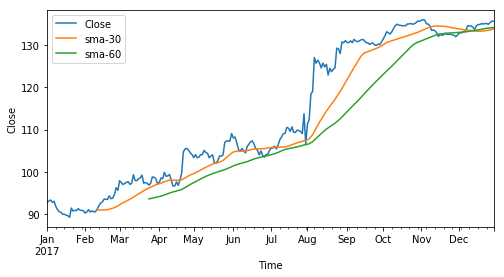

In [796]:
plot_price(f, 'Close', '2017/1/1', '2017/12/31')
plot_price2(f, 'Close', '2017/1/1', '2017/12/31', 30)
plot_price2(f, 'Close', '2017/1/1', '2017/12/31', 60)
plt.legend(('Close','sma-30','sma-60'))

The closing price shows every slight variation of stock and that it reached its peak in November.
but sma of 30 day shows that it increase from feb to jun and stayed almost constant till aug and increased after.
but sma of 60 day shows a constant increase from april to october.

C:\Users\rithu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


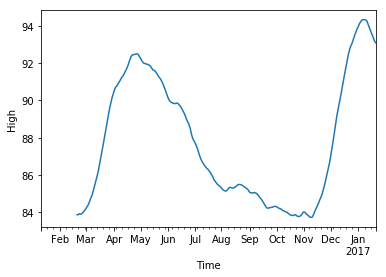

In [797]:
plot_price2(f,'High','Jan 10, 2016','Jan 20, 2017',sma=30)

# Exercise 1E

Q.Define a function plot_volume that visualizes the trend in aggregate trading volume (sum) over a downsampled period. 
The function should take in the full stock data frame and a frequency argument (freq) similar to those defined in Table 11-4 in the text. 
The function should sum the total trading volume over the specified time period, which should be less frequent than the daily data that you have extracted from Morningstar (e.g., monthly, quarterly, annually). 
The visualization should be of the appropriate type for this data, and the y-axis should be appropriately labeled (the x-axis should be in an appropriate datetime format and does not need to be labeled). 
Demonstrate the performance of your function on the quarterly volume of your selected stock for the full date range. 
Provide a brief description of any trends that you observe in the aggregated trading volume of your selected stock.

In [798]:
def plot_volume(data_frame,freq):
    data_frame['Volume'].resample(freq).mean().plot()
    plt.ylabel("Aggregate Trading Volume")
    return

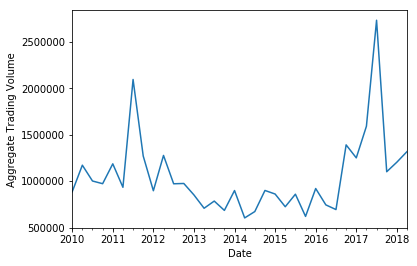

In [799]:
plot_volume(f,'Q')

The aggregated trading volume of Rockewell Collins reaches a peak of 2000000 at the second quarter of 2011 and a peak of over 2500000 at the second quarter of 2017